In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np

In [3]:
# 국가명 -> 국가코드로 변경
# https://towardsdatascience.com/matching-country-information-in-python-7e1928583644
# pip install pycountry
import pycountry
df= pd.read_csv('report_0809.csv', header=0)

def findCountryNumeric (country_name):
    try:
        return pycountry.countries.get(name=country_name).numeric
    except:
        return ("not founded!")
df['country_numeric'] = df.apply(lambda row: findCountryNumeric(row.Country) , axis = 1)
df['country_numeric']
df['country_numeric']= df['country_numeric'].astype("category")
# 못찾아진것들은 구글링해서 csv에 넣기!

In [ ]:
# 나라이름으로 대륙(AF: 아프리카, AS: 아시아, EU: 유럽, NA: 북미, ... 등등)으로 바꾸기
# https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10
# pip install pycountry-convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

df['continent'] = df.apply(lambda row: get_continent(row.country) , axis = 1)
df['continent']
# 못찾아진것들은 구글링해서 csv에 넣기! (코트디부아르만 Unknown뜸)

In [11]:
df= pd.read_csv('happy_0811.csv', header=0)
df['year']= df['year'].astype("category")
model = ols("HS~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     98.03
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:18:28   Log-Likelihood:                -664.37
No. Observations:                1890   AIC:                             1669.
Df Residuals:                    1720   BIC:                             2611.
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.5273      0.834     -5.427      0.000      -6.164      -2.891
C(country)[T.Albania]                      0.2629      0.263      1.001      0.317      -0.252       0.778
C(country)[T.Algeria]                      0.5782      0.246      2.350      0.019       0.096       1.061
C(country)[T.Angola]                      -1.1145      0.275     -4.052      0.000      -1.654      -0.575
C(country)[T.Argentina]                    0.3902      0.293      1.334      0.182      -0.184       0.964
C(country)[T.Armenia]                      0.0982      0.283      0.347      0.729      -0.457       0.654
C(country)[T.Australia]                    0.3378      0.396      0.852      0.394      -0.440       1.115
C(country)[T.Austria]                      0.2848      0.374      0.762      0.446      -0.449       1.018
C(country)[T.Azerbaijan]                   0.0516      0.277      0.187      0.852      -0.491       0.594
C(country)[T.Bahrain]                     -0.3944      0.376     -1.048      0.295      -1.133       0.344
C(country)[T.Bangladesh]                   0.6245      0.241      2.596      0.010       0.153       1.096
C(country)[T.Belarus]                      0.7088      0.413      1.716      0.086      -0.102       1.519
C(country)[T.Belgium]                      0.0217      0.387      0.056      0.955      -0.738       0.781
C(country)[T.Belize]                       1.6203      0.346      4.679      0.000       0.941       2.300
C(country)[T.Benin]                       -0.1513      0.170     -0.891      0.373      -0.485       0.182
C(country)[T.Bhutan]                      -0.6461      0.340     -1.898      0.058      -1.314       0.021
C(country)[T.Bolivia]                      0.8217      0.226      3.634      0.000       0.378       1.265
C(country)[T.Bosnia and Herzegovina]       0.4979      0.280      1.777      0.076      -0.052       1.047
C(country)[T.Botswana]                    -2.0124      0.296     -6.805      0.000      -2.592      -1.432
C(country)[T.Brazil]                       1.1110      0.271      4.098      0.000       0.579       1.643
C(country)[T.Bulgaria]                    -0.6595      0.325     -2.032      0.042      -1.296      -0.023
C(country)[T.Burkina Faso]                -0.1388      0.174     -0.797      0.425      -0.480       0.203
C(country)[T.Burundi]                      0.7781      0.228      3.410      0.001       0.331       1.226
C(country)[T.Cambodia]                    -0.2599      0.230     -1.132      0.258      -0.710       0.191
C(country)[T.Cameroon]                     0.0569      0.187      0.305      0.760      -0.309       0.423
C(country)[T.Canada]                       0.4980      0.377      1.321      0.187     

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


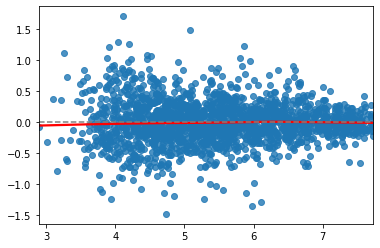

In [12]:
# 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
fitted= model.predict(df)
residual= df['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')


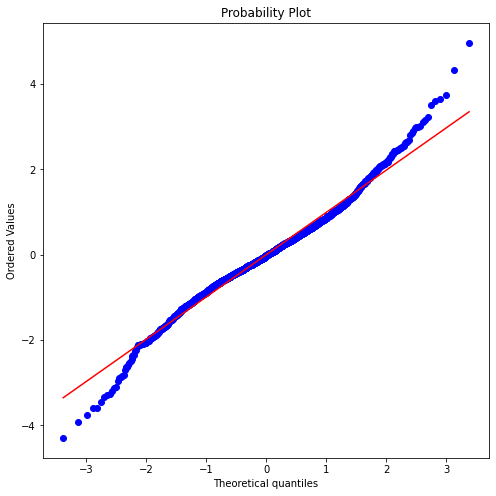

In [13]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [14]:
scipy.stats.shapiro(residual) # 문제 발생

(0.9832943081855774, 4.663730203890645e-14)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

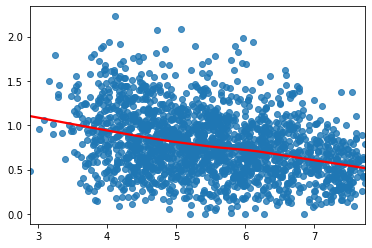

In [15]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

In [19]:
# 스케일 조정
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['HS', 'log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol','suicide','obesity', 'birth', 'mental']

scale_df= standard_scaling(df, scale_columns)
scale_df.head()

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
0,Afghanistan,2008,-1.565520,-1.755414,-3.072022,-1.713920,-0.182681,1.048847,0.746260,-1.763274,-0.600423,-1.020601,-0.838655,2.702682,-1.331093,4,AS
1,Afghanistan,2009,-0.961034,-1.606971,-2.219199,-1.660053,-0.457715,1.184371,0.575410,-1.731756,-0.605429,-1.001012,-0.747639,2.561568,-1.282781,4,AS
2,Afghanistan,2010,-0.643634,-1.513539,-2.328968,-1.606186,-1.014835,0.759318,-0.188076,-1.700239,-0.609039,-0.972700,-0.674431,2.413143,-1.222866,4,AS
3,Afghanistan,2011,-1.469230,-1.537116,-2.480956,-1.563093,-1.748259,1.011886,-0.059939,-1.668721,-0.613335,-0.947238,-0.621008,2.261793,-1.170343,4,AS
4,Afghanistan,2012,-1.512917,-1.462894,-2.480956,-1.520000,-1.501433,1.467740,0.180319,-1.637203,-0.617529,-0.931242,-0.579458,2.109711,-1.130208,4,AS


In [20]:
# 표준편차 출력 (스케일 조정 후)
scale_df.describe().loc["std"]

HS               1.000000
log_gdp          1.000000
social           1.000000
life_exp         1.000000
freedom          1.000000
generosity       1.000000
corruption       1.000000
schooling        1.000000
alcohol          1.000000
suicide          1.000000
obesity          1.000000
birth            1.000000
mental           1.000000
country_num    255.124735
Name: std, dtype: float64

In [21]:
model = ols("HS~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=scale_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     98.03
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:25:36   Log-Likelihood:                -447.46
No. Observations:                1890   AIC:                             1235.
Df Residuals:                    1720   BIC:                             2177.
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.1316      0.205     -0.643      0.521      -0.533       0.270
C(country)[T.Albania]                      0.2344      0.234      1.001      0.317      -0.225       0.694
C(country)[T.Algeria]                      0.5155      0.219      2.350      0.019       0.085       0.946
C(country)[T.Angola]                      -0.9937      0.245     -4.052      0.000      -1.475      -0.513
C(country)[T.Argentina]                    0.3479      0.261      1.334      0.182      -0.164       0.859
C(country)[T.Armenia]                      0.0876      0.252      0.347      0.729      -0.408       0.583
C(country)[T.Australia]                    0.3012      0.353      0.852      0.394      -0.392       0.994
C(country)[T.Austria]                      0.2539      0.333      0.762      0.446      -0.400       0.908
C(country)[T.Azerbaijan]                   0.0460      0.247      0.187      0.852      -0.438       0.530
C(country)[T.Bahrain]                     -0.3517      0.336     -1.048      0.295      -1.010       0.307
C(country)[T.Bangladesh]                   0.5567      0.214      2.596      0.010       0.136       0.977
C(country)[T.Belarus]                      0.6319      0.368      1.716      0.086      -0.091       1.354
C(country)[T.Belgium]                      0.0193      0.345      0.056      0.955      -0.658       0.697
C(country)[T.Belize]                       1.4446      0.309      4.679      0.000       0.839       2.050
C(country)[T.Benin]                       -0.1349      0.151     -0.891      0.373      -0.432       0.162
C(country)[T.Bhutan]                      -0.5760      0.303     -1.898      0.058      -1.171       0.019
C(country)[T.Bolivia]                      0.7326      0.202      3.634      0.000       0.337       1.128
C(country)[T.Bosnia and Herzegovina]       0.4439      0.250      1.777      0.076      -0.046       0.934
C(country)[T.Botswana]                    -1.7942      0.264     -6.805      0.000      -2.311      -1.277
C(country)[T.Brazil]                       0.9906      0.242      4.098      0.000       0.516       1.465
C(country)[T.Bulgaria]                    -0.5880      0.289     -2.032      0.042      -1.156      -0.020
C(country)[T.Burkina Faso]                -0.1238      0.155     -0.797      0.425      -0.428       0.181
C(country)[T.Burundi]                      0.6938      0.203      3.410      0.001       0.295       1.093
C(country)[T.Cambodia]                    -0.2318      0.205     -1.132      0.258      -0.633       0.170
C(country)[T.Cameroon]                     0.0507      0.166      0.305      0.760      -0.275       0.377
C(country)[T.Canada]                       0.4440      0.336      1.321      0.187     